In [ ]:
import dash
import visdcc
import numpy as np
import pandas as pd
import networkx as nx

from pyvis.network import Network
import dash_core_components as dcc
import dash_html_components as html


In [ ]:
net = Network(notebook=True)


In [4]:
app = dash.Dash()


In [208]:
import plotly.express as px

df = pd.read_excel("C:/Users/Audrey/Documents/ACLU Project Research/Budget/ADOPTED_BUDGET_DASHBOARD_FY_2021-22_DATAFILE.xlsx")

def flatten(lis):
     for item in lis:
        if isinstance(item, Iterable) and not isinstance(item, str):
            for x in flatten(item):
                yield x
        else:        
             yield item
colorList = px.colors.qualitative.Light24
colorList.append(px.colors.qualitative.Alphabet)
colorList = list(flatten(colorList))

In [536]:
df.head()

,Bureau - Name,Account Type,Major Object - Name,CommItem - Name,Fund - Name,Subfund,Subfund Name,Program -Name,Sub-Program,Sub-Program Name,Funds Center - Name,Funds Center - Name.1,Fnd Prgms - Name,2017-18 Adopted Budget,2018-19 Adopted Budget,2019-20 Adopted Budget,2020-21 Adopted Budget,2021-22 Adopted Budget
0,AT - Office of the City Attorney,R,GFD - General Fund Discretionary,487110 - General Fund Discretionary Ongoing,100000 - General Fund,100000.0,General Fund,LALS - Legal Services,LALS00,Legal Services,ATAT000001 - Office of City Attorney,ATAT000001 - Office of City Attorney,0 - 0,2784520.0,2893066.0,3495429.0,3487440.0,3533935.0
1,AT - Office of the City Attorney,R,GFD - General Fund Discretionary,487120 - General Fund Discretionary One-Time,100000 - General Fund,100000.0,General Fund,LALS - Legal Services,LALS00,Legal Services,ATAT000001 - Office of City Attorney,ATAT000001 - Office of City Attorney,0 - 0,406783.0,320003.0,140363.0,36478.0,99001.0
2,AT - Office of the City Attorney,R,IAREV - Interagency Revenue,642233 - Legal Services,100000 - General Fund,100000.0,General Fund,LALS - Legal Services,LALS00,Legal Services,ATAT000001 - Office of City Attorney,ATAT000001 - Office of City Attorney,7AT2DR0001 - Attorney-FPDR IA,248169.0,259711.0,272670.0,276158.0,289676.0
3,AT - Office of the City Attorney,R,IAREV - Interagency Revenue,642233 - Legal Services,100000 - General Fund,100000.0,General Fund,LALS - Legal Services,LALS00,Legal Services,ATAT000001 - Office of City Attorney,ATAT000001 - Office of City Attorney,7AT2DS0001 - Vacant houses,165250.0,165250.0,0.0,0.0,0.0
4,AT - Office of the City Attorney,R,IAREV - Interagency Revenue,642233 - Legal Services,100000 - General Fund,100000.0,General Fund,LALS - Legal Services,LALS00,Legal Services,ATAT000001 - Office of City Attorney,ATAT000001 - Office of City Attorney,7AT2ES0001 - Attorney-BES IA,1050105.0,1104681.0,1159992.0,1451506.0,1881502.0


In [584]:
#arr = [[k for v in {range(len())) : np.unique(np.array(df.iloc[0:,i]))} if df.iloc[j,i]==v] for i in range(len(df.columns)) for j in range(len(df))]
from collections.abc import Iterable
from string import Template

def flatten(lis):
     for item in lis:
        if isinstance(item, Iterable) and not isinstance(item, str):
            for x in flatten(item):
                yield x
        else:        
             yield item

def scale_list(l, to_min, to_max):
    return [[abs(to_min + (val - max(l)) * ((to_max - to_min) / (max(l) - min(l))))] for val in l]
def b(l):
    return [int(round(abs(l[i]))) for i in range(len(l))]
htmlHoverTT = f"""<html>
                    <body>
                        <h3><span style="background-color: #2b2301; 
                                         color: #fff; 
                                         display: inline-block; 
                                         padding: 3px 10px; 
                                         font-weight: bold; 
                                         border-radius: 5px;">$cost</span>&nbsp;$item&nbsp;</h3>
                        <h3>Bureau: $bureau</h3>
                        <h3>Program: $program</h3>
                        <h3>Fund: $fund</h3>
                        <h3>Category: $category</h3>
                    </body>
                </html>"""


G = nx.Graph()       


t =  pd.DataFrame([
                    df[df.columns[6]],  # Subfund 
                    df[df.columns[0]],  # Bureau 
                    df[df.columns[10]], # Funds 
                    df[df.columns[7]],  # Program 
                    df[df.columns[8]],  # Sub-Program 
                    df[df.columns[2]],  # Major Object 
                    df[df.columns[3]],  # CommItem  
                    df[df.columns[13]], # 2017-2018  
                    df[df.columns[14]], # 2018-2019 
                    df[df.columns[15]], # 2019-2020
                    df[df.columns[16]], # 2020-2021  
                    df[df.columns[17]]  # 2021-2022
]).T

group = {}
tmp = []

j = 0
for i in range(len(df)):
    if str(df.iloc[i,0]) not in group:
        group.update({str(df.iloc[i,0]) : colorList[j]})
        j+=1
    tmp.append(group[df.iloc[i,0]])
    
        
colNodes = len(t.columns)-5

tmp = {}

for i in range(colNodes):
              t.iloc[0:,i] =  t.iloc[0:,i].astype(str)
group = {}
arr = []
arrlab = []

j = 0
for i in range(len(df)):
    if str(df.iloc[i,0]) not in group:
        group.update({str(df.iloc[i,0]) : colorList[j]})
        j+=1
    arr.append(group[df.iloc[i,0]])
    
    
node_tmp = pd.DataFrame()
node_tmp["group"] =  list(flatten([arr for x in range(colNodes)]))
node_tmp["label"] =  list(flatten([t.iloc[i,x] for i in range(len(t)) for x in range(colNodes)]))
node_tmp["n_id"] =  np.array([[tmp.setdefault(string, len(tmp)+(x*len(df))) 
                             for string in t.iloc[0:,x]]
                             for x in range(colNodes)]).reshape(1,-1)[0]


node_tmp["cost"] = list(flatten([t.iloc[:,-1].apply(lambda x: float(x))]*7))

summed = pd.DataFrame(node_tmp.groupby(["n_id"], as_index=True).sum())

nodedf = pd.DataFrame()
nodedf["group"] =  list(flatten([arr for x in range(colNodes)]))
nodedf["n_id"] = node_tmp["n_id"]
nodedf["label"] = node_tmp["label"]
nodedf = nodedf.drop_duplicates("n_id")
nodedf["cost"] = summed["cost"]


nodes = {"id" : list(flatten(nodedf["n_id"])),
         
         "size" : list(flatten(scale_list(summed["cost"], 1, 20))),
         "label" : list(flatten([' : '.join([str(nodedf.iloc[i,2]),str(summed.iloc[i,0])]) for i in range(len(nodedf))])),
         "color" : list(flatten(nodedf["group"])),
         
         "source" :  list(node_tmp.iloc[0:len(node_tmp)-1,2]),
         
         "target" :  list(node_tmp.iloc[1:len(node_tmp),2]),
         

 }


In [588]:
import json



# convert into JSON:
y = json.dumps(nodes)

with open('data.json', 'w') as f:
    json.dump(y, f)

In [390]:
G = nx.Graph()  
for i in range(len(nodes["n_id"])):
    G.add_node(nodes["n_id"][i], 
               value=nodes["size"],
               title=" ".join([str(nodes["label_n"][i]),str(nodes["title_n"][i])]), 
               x=nodes["x"][i],
               y=nodes["y"][i],
               color=nodes["color"][i], data=True)
u = nodes["source"]
v = nodes["target"]
for i in range(len(u)):
    G.add_edge(u[i],int(v[i]))

    

In [470]:
lines_df = pd.DataFrame()
lines_df["x"] = []
lines_df

,x


In [549]:
lines_df


,x


In [462]:
d = pd.DataFrame()

    
    
firstList = nodes["source"]
secondList = nodes["target"]
linesList = []
lineList = []
counter = 0
while firstList:
    aVal = firstList.pop(counter)
    bVal = secondList.pop(counter)
    lineList.append([aVal,bVal])
    if bVal in firstList:
        counter = firstList.index(bVal)
        continue
    else:
        lines.append(lineList)
        lineList = []
        counter = 0
        continue

lineList

[]

In [505]:

#p = p.rename(columns = {0:'x'})
#p = p.rename(columns = {1:'y'})
s = p.set_index('index').T.to_dict('list')
#p.reset_index(inplace=True)


In [514]:
p = pd.DataFrame(pos).T
p

,0,1
0,0.129569,-0.026599
1,0.659704,-0.045771
2,0.660052,-0.045984
3,0.659726,-0.045786
4,0.603517,-0.364695
...,...,...
316711,-0.056704,-0.365468
316712,-0.107527,-0.301357
316713,-0.112125,-0.344210
316714,0.038041,-0.353125


In [512]:
import plotly.graph_objects as go
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
df.loc[p[0] == some_value]
lines_x = []
lines_y = []
for i in range(len(lines)):
    line_x = []
    line_y = []
    x = lines[i]
    for j in range(len(x)):
        line_x.append(s[x[j][0]][1])
        line_y.append(s[x[j][1]][2])
    lines_x.append(line_x)
    lines_y.append(line_y)

KeyError: 0

In [ ]:
 x_new = np.linspace(x_spl.min(), x_spl.max(),500)
    f = interp1d(x_spl, y_spl, kind='quadratic')
    y_smooth=f(x_new)
    lines_x.append([x_new])
    lines_y.append([y_smooth])

In [525]:
fstr = f""""
Bureau: {0} Label: {1} Cost: {2}
"""

lab = [fstr.format(str([i]), str(nodedf["cost"][i]), str(nodes["label_n"][i])) for i in range(len(nodes["label_n"]))]

KeyError: 1

In [545]:
c = pd.DataFrame()
c["label"] = pd.DataFrame(nodes["label_n"])
c = c.drop_duplicates()



for l in nodes["label_n"]:
    colArr = []
    yArr = []
    xArr = []
    sizeArr = []
    txArr = []
    for i in range(len(nodes["label_n"])):
        if nodes["label_n"][i]==l:
            colArr.append(nodes["color"][i])
            yArr.append(p.iloc[i:,1])
            xArr.append(p.iloc[i:,0])
            sizeArr.append(nodes["size"][i])
            txArr.append(nodes["label_n"][i])    
            
    fig.add_trace(go.Scatter(x=xArr, 
                         y=yArr, text=txArr, mode="markers",
                         marker = dict(color=colArr,size=sizeArr,opacity=0.6))
    )
            


KeyboardInterrupt: 

In [547]:
c

,label
0,AT - Office of the City Attorney
6,AU - Office of the City Auditor
26,CL - Portland Children's Levy
56,DR - Bureau of Fire & Police Disability & Reti...
61,DS - Bureau of Development Services
152,EC - Bureau of Emergency Communications
153,EM - Portland Bureau of Emergency Management
230,ES - Bureau of Environmental Services
276,FM - Fund & Debt Management
277,FR - Portland Fire & Rescue


In [548]:
fig = go.Figure()
# Add traces
j=0

c = pd.DataFrame()
c["label"] = pd.DataFrame(nodes["label_n"])
c = c.drop_duplicates()


fig.add_trace(go.Scatter(x=p.iloc[0:,0], 
                         y=p.iloc[0:,1], mode="lines",
                         line = dict(width=0.5, color='#888', shape="spline"))
)

for l in c["label"]:
    colArr = []
    yArr = []
    xArr = []
    sizeArr = []
    txArr = []
    for i in range(len(nodes["label_n"])):
        if nodes["label_n"][i]==l:
            colArr.append(nodes["color"][i])
            yArr.append(p.iloc[i:,1])
            xArr.append(p.iloc[i:,0])
            sizeArr.append(nodes["size"][i])
            txArr.append(nodes["label_n"][i])    
            
    fig.add_trace(go.Scatter(x=xArr, 
                         y=yArr, text=txArr, mode="markers",
                         marker = dict(color=colArr,size=sizeArr,opacity=0.6))
    )
        




fig.add_trace(go.Scatter(x=p.iloc[0:,0], 
                         y=p.iloc[0:,1], text=nodes["label_n"], mode="markers",
                         marker = dict(color=nodes["color"],size=nodes["size"],opacity=0.6))
)


# Create a trace
fig.write_html("b.html")

In [332]:

group = {}
arr = []
arrlab = []

j = 0
for i in range(len(df)):
    if str(df.iloc[i,0]) not in group:
        group.update({str(df.iloc[i,0]) : colorList[j]})
        j+=1
    arr.append(group[df.iloc[i,0]])
    
    
node_tmp = pd.DataFrame()
group =  list(flatten([arr for x in range(colNodes)]))
label =  list(flatten([[df.iloc[i,x] for i in range(len(df))] for x in range(colNodes)]))
node_tmp["n_id"] =  np.array([[tmp.setdefault(string, len(tmp)+(x*len(df))) 
                             for string in t.iloc[0:,x]]
                             for x in range(colNodes)]).reshape(1,-1)[0]
node_tmp["cost"] = list(flatten([t.iloc[:,-1].apply(lambda x: float(x))]*7))
summed = node_tmp.groupby(["n_id"], as_index=True).sum()
len(summed)

2466

In [346]:
print(df['Comedy_Score'].where(df['Rating_Score'] == ))

In [348]:
p[0]

0         0.193189
1        -0.107488
2        -0.107431
3        -0.107477
4         0.276713
            ...   
316711   -0.029687
316712   -0.241967
316713   -0.037224
316714    0.026928
316715   -0.211412
Name: 0, Length: 2466, dtype: float64

In [338]:
group

,color,node,label,cost
0,#FD3216,0,AT - Office of the City Attorney,1.540530e+09
92,#00FE35,1,AU - Office of the City Auditor,2.241012e+08
93,#00FE35,2,AU - Office of the City Auditor,0.000000e+00
94,#00FE35,3,AU - Office of the City Auditor,0.000000e+00
102,#00FE35,4,AU - Office of the City Auditor,0.000000e+00
...,...,...,...,...
361999,#782AB6,316711,Water,NaN
362145,#782AB6,316712,Water,NaN
362623,#782AB6,316713,Water,NaN
362650,#782AB6,316714,Water,NaN


In [436]:
edge_x

[0.12956850230693817,
 0.6597041487693787,
 None,
 0.6600520014762878,
 0.6597259640693665,
 None,
 0.6035171747207642,
 0.6829854249954224,
 None,
 0.4613378643989563,
 -0.41588297486305237,
 None,
 -0.3754250109195709,
 -0.3917264938354492,
 None,
 0.44718295335769653,
 0.4521186053752899,
 None,
 0.19566400349140167,
 -0.24147829413414001,
 None,
 -0.009966420941054821,
 0.44593557715415955,
 None,
 -0.10997063666582108,
 -0.021615605801343918,
 None,
 -0.003942396957427263,
 0.09158749878406525,
 None,
 0.013546667993068695,
 0.0396440252661705,
 None,
 0.03159613534808159,
 0.017240222543478012,
 None,
 0.052603643387556076,
 -0.0046087466180324554,
 None,
 0.68516606092453,
 0.6284717917442322,
 None,
 0.672704815864563,
 0.6446223258972168,
 None,
 -0.004002748988568783,
 0.6900761127471924,
 None,
 0.7063082456588745,
 0.6850684285163879,
 None,
 0.6469067931175232,
 0.693500816822052,
 None,
 0.6711267232894897,
 0.6802889704704285,
 None,
 0.616006076335907,
 0.65758472681045

In [430]:
nodes["x"]

[0.12956850230693817,
 0.899702250957489,
 0.8953131437301636,
 0.879085123538971,
 0.8674582242965698,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 n

In [433]:
import plotly.graph_objects as go

edge_x = []
edge_y = []
for i in range(0,len(nodes["x"]),3):
    edge_x.append(nodes["x"][i])
    edge_x.append(nodes["x"][i])
    edge_x.append(None)
for i in range(0,len(nodes["y"]),3):  
    edge_y.append(x0)
    edge_y.append(x1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#000000'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
sizes=[]
titles=[]
j=0
for i in nodes["n_id"]:
    x, y = pos[i]
    node_x.append(x)
    node_y.append(y)
    sizes.append(abs(nodes["title_n"][j]))
    titles.append(nodes["label_n"][j])
    j+=1
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    text=titles,
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=sizes,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

[0.12956850230693817,
 0.6597041487693787,
 None,
 0.6600520014762878,
 0.6597259640693665,
 None,
 0.6035171747207642,
 0.6829854249954224,
 None,
 0.4613378643989563,
 -0.41588297486305237,
 None,
 -0.3754250109195709,
 -0.3917264938354492,
 None,
 0.44718295335769653,
 0.4521186053752899,
 None,
 0.19566400349140167,
 -0.24147829413414001,
 None,
 -0.009966420941054821,
 0.44593557715415955,
 None,
 -0.10997063666582108,
 -0.021615605801343918,
 None,
 -0.003942396957427263,
 0.09158749878406525,
 None,
 0.013546667993068695,
 0.0396440252661705,
 None,
 0.03159613534808159,
 0.017240222543478012,
 None,
 0.052603643387556076,
 -0.0046087466180324554,
 None,
 0.68516606092453,
 0.6284717917442322,
 None,
 0.672704815864563,
 0.6446223258972168,
 None,
 -0.004002748988568783,
 0.6900761127471924,
 None,
 0.7063082456588745,
 0.6850684285163879,
 None,
 0.6469067931175232,
 0.693500816822052,
 None,
 0.6711267232894897,
 0.6802889704704285,
 None,
 0.616006076335907,
 0.65758472681045

In [120]:
node_adjacencies = []
node_text = []
for i in range(len(nodes["n_id"])):
    node_adjacencies.append(sizes[i])
    node_text.append(titles[i])

node_trace.hovertext = node_adjacencies
node_trace.text = node_text

In [126]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.write_html("budget.html")

In [123]:
i.write_html("x.html")

AttributeError: 'int' object has no attribute 'write_html'

In [615]:
t =  pd.DataFrame([
 0                   df[df.columns[6]],  # Subfund 0
  1                  df[df.columns[0]],  # Bureau 1
   2                 df[df.columns[10]], # Funds 2
    3                df[df.columns[7]],  # Program 
     4               df[df.columns[8]],  # Sub-Program 
      5              df[df.columns[2]],  # Major Object 
       6             df[df.columns[3]],  # CommItem  
        7            df[df.columns[13]], # 2017-2018  
         8           df[df.columns[14]], # 2018-2019 
          9          df[df.columns[15]], # 2019-2020
           10         df[df.columns[16]], # 2020-2021  
                    df[df.columns[17]]  # 2021-2022
])


In [ ]:

nodes["tag"][0]

In [ ]:
colRange = len(t)

l = pd.DataFrame([nodes["n_id"][colRange*i:(colRange*i)+colRange] for i in range(colNodes)]).T
l

In [667]:
s.iloc[:,0]

0     52641
1     52642
2     52643
3     52644
4     52645
5     52646
6     52647
7     52648
8     52649
9     52650
10    52651
11    52652
12    52653
13    52654
14    52655
15    52656
16    52657
17    52658
18    52659
19    52660
20    52661
21    52662
22    52663
23    52664
24    52665
25    52666
26    52667
27    52668
28    52669
Name: 1, dtype: int64

In [11]:

def flatten(lis):
     for item in lis:
        if isinstance(item, Iterable) and not isinstance(item, str):
            for x in flatten(item):
                yield x
        else:        
             yield item


len(df2)


366625

,nid,cost
0,0,1.540530e+09
1,1,1.697000e+05
2,2,6.000000e+07
3,3,6.049118e+07
4,4,1.007500e+06
...,...,...
2461,316711,2.704000e+04
2462,316712,3.616400e+04
2463,316713,0.000000e+00
2464,316714,4.000000e+03


In [491]:
txt = "ZD - Prosper Portland"

x = txt.split(" - ")[1]

cost = "$" + "{:,}".format(df.iloc[row,-1]), 
                              subprogram = df.iloc[row,9],  
                              bureau = df.iloc[row,0], 
                              program = df.iloc[row,7], 
                              fund = df.iloc[row,6],  
                              category = df.iloc[row,2],  
                              item = df.iloc[row,3]) 

Prosper Portland


In [ ]:
for index, row in df.iterrows():
    for col in range(0, lengthColumns):
        edges.loc[index, 'source'] = row[col]
        edges.loc[index, 'target'] = row[col+1]
        edges.loc[index, 'weight'] = row[-1]

In [92]:
len(df)

52375

In [ ]:
for index, row in df.iterrows():
    for col in range(0, lengthColumns):
        edges.loc[index, 'type'] = row[7]

In [ ]:
G = nx.from_pandas_edgelist(edges,
                            source='source',
                            target='target',
                            create_using=nx.Graph())

ID
3495429.0    61
140363.0     61
272670.0     61
0.0          61
1159992.0    61
             ..
0.0          14
0.0          14
233126.0     14
210000.0     14
0.0          33
Length: 52375, dtype: int16

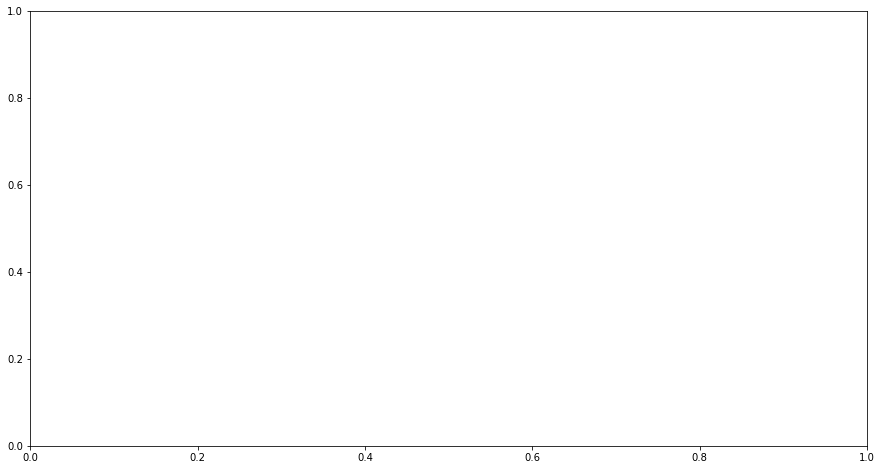

In [40]:
fig, ax = plt.subplots(figsize=(15, 8))

relationships = pd.DataFrame({'from': edges.source, 
                              'to':   edges.target})

# Create DF for node characteristics
carac = pd.DataFrame({'ID': edges.source, 
                      'type':edges.type})
# Create graph object
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

# Make types into categories
carac = carac.set_index('ID')


carac['type'] = pd.Categorical(carac['type'])
carac['type'].cat.codes
G.

In [83]:
edges.head()


,source,target,weight,type
0,3495429.0,3487440.0,3533935.0,LALS - Legal Services
1,140363.0,36478.0,99001.0,LALS - Legal Services
2,272670.0,276158.0,289676.0,LALS - Legal Services
3,0.0,0.0,0.0,LALS - Legal Services
4,1159992.0,1451506.0,1881502.0,LALS - Legal Services


In [73]:
import plotly.graph_objects as go
edges['cumcount'] = edges.groupby('type').cumcount()



edge_trace = go.Scatter(
    x=edges.source, y=edges.target,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')



node_trace = go.Scatter(
    x=edges.source, y=edges.target,
    text=edges.source.astype(str)  + ": " + edges.weight.astype(str),
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=edges.cumcount,
        size=edges.weight,

        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [69]:
from sklearn import preprocessing

df = edges.weight
edges['weightScaled'] = (df-df.min())/(df.max()-df.min())



In [80]:
x = G.source

AttributeError: 'Graph' object has no attribute 'source'

In [74]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.write_html("ratsnestBudget.html")

In [ ]:
app.layout = html.Div({
    visdcc.Network(id ='net',
                  data = {'nodes':nodes,'edges':edges},
                  options = dict(height='600px', width='100%')),
    doc.RadioItems(id='color',
                  options=[{'label':'Red', 'value': '#ff0000'},
                           {'label':'Green', 'value': '#00ff00'},
                           {'label':'Blue', 'value': '#0000ff'}],
                  value='Red')
})

In [ ]:
@app.callback(
    Output('net', 'options'),
    [Input('color','value')])
def myfun(x):
    return {'nodes':{color:x}}
if __name__ == "__main__":
    app.run_server(debug=True)